In [5]:
%pip install control
import control as ct
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Define numerator and denominator coefficients
numerator = np.array([4])  # Represents 1 in the numerator
denominator = np.array([3, -2, 1]) # Represents s + 0.1 in the denominator

# Create the transfer function object
#tidak menampilkan bentuk dari transfer function
#F = signal.TransferFunction(numerator, denominator)
#print(F)
#menampilkan bentuk dari transfer function
G = ct.tf(numerator, denominator)
print('H(s) = ' ,G)

H(s) =  <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         4
  ---------------
  3 s^2 - 2 s + 1


GRAFIK RESPONSE SISTEM 

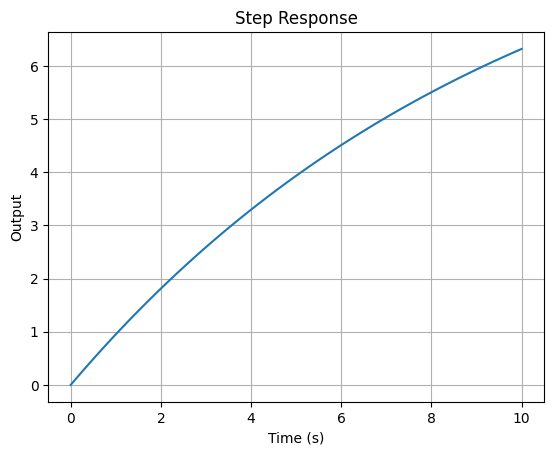

In [7]:
numerator = [1]
denominator = [1, 0.1]
G = ct.tf(numerator, denominator)
    
time = np.linspace(0, 10, 100) # Time vector
t, response = ct.step_response(G, time)
    
plt.plot(t, response)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid()
plt.show()

In [14]:
G1 = 5 * ct.tf(np.poly([-2, -5]), np.poly([-4, -5, -9]))
print('G1(s) = ', G1)
# Simplify the transfer function
G1_simplified = ct.minreal(G1)
print('G1(s) Simplified = ', G1_simplified)

G1(s) =  <TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      5 s^2 + 35 s + 50
  --------------------------
  s^3 + 18 s^2 + 101 s + 180
1 states have been removed from the model
G1(s) Simplified =  <TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     5 s + 10
  ---------------
  s^2 + 13 s + 36


OPERASI PENJUMLAHAN, PERKALIAN, PEMBAGIAN, DAN PENGURANGAN TRANSFER FUNCTION 

In [16]:
G2 = G + G1
print('G2(s) = ', G2)
G3 = G * G1
print('G3(s) = ', G3)
F = ct.feedback(G, G1)
print('F(s) = ', F)

G2(s) =  <TransferFunction>: sys[19]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      6 s^3 + 53.5 s^2 + 154.5 s + 185
  -----------------------------------------
  s^4 + 18.1 s^3 + 102.8 s^2 + 190.1 s + 18
G3(s) =  <TransferFunction>: sys[20]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

              5 s^2 + 35 s + 50
  -----------------------------------------
  s^4 + 18.1 s^3 + 102.8 s^2 + 190.1 s + 18
F(s) =  <TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         s^3 + 18 s^2 + 101 s + 180
  -----------------------------------------
  s^4 + 18.1 s^3 + 107.8 s^2 + 225.1 s + 68


FUNGSI POLE ZERO DAN PZMAP 

Poles of G1(s): [-9.+0.j -5.+0.j -4.+0.j]
Zeros of G1(s): [-5.+0.j -2.+0.j]


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


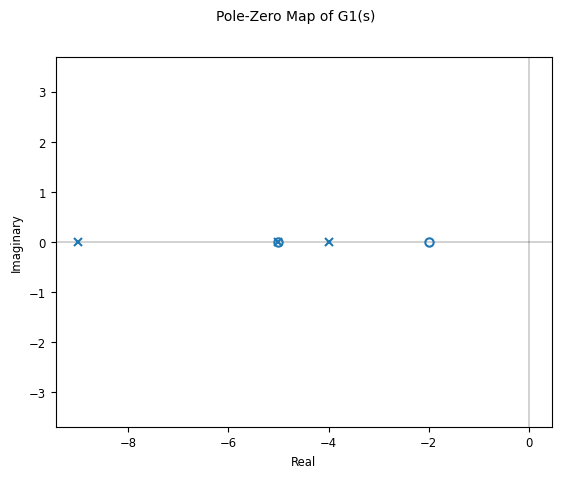

In [21]:
pole = ct.poles(G1)
print('Poles of G1(s):', pole)
zero = ct.zeros(G1)
print('Zeros of G1(s):', zero)
ct.pzmap(G1, plot=True, title='Pole-Zero Map of G1(s)')
plt.show()

TRANSFER FUNCTION MENJADI STATE SPACE 

In [22]:
G1_SS = ct.tf2ss(G1)
print('State-Space Representation of G1(s):')
print(G1_SS)

State-Space Representation of G1(s):
<StateSpace>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ -18. -101. -180.]
     [   1.    0.    0.]
     [   0.    1.    0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 5. 35. 50.]]

D = [[0.]]


STATE SPACE MENJADI TRANSFER FUNCTION

In [23]:
G1_TF = ct.ss2tf(G1_SS)
print('Transfer Function from State-Space Representation of G1(s):')
print(G1_TF)

Transfer Function from State-Space Representation of G1(s):
<TransferFunction>: sys[23]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      5 s^2 + 35 s + 50
  --------------------------
  s^3 + 18 s^2 + 101 s + 180


STATE SPACE MODEL 

In [26]:
A = [[0,1,0],[0, 0, 1], [-1, -2, -3]]
B = [[0],[0],[1]]
C = [[1, 0, 0]]
D = [[0]]
sys = ct.ss(A, B, C, D)
sys_tf = ct.ss2tf(sys)
print('Transfer Function from State-Space Representation:')
print(sys_tf)

Transfer Function from State-Space Representation:
<TransferFunction>: sys[29]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  8.882e-16 s^2 + 8.882e-16 s + 1
  -------------------------------
       s^3 + 3 s^2 + 2 s + 1


IMPULSE RESPONSE

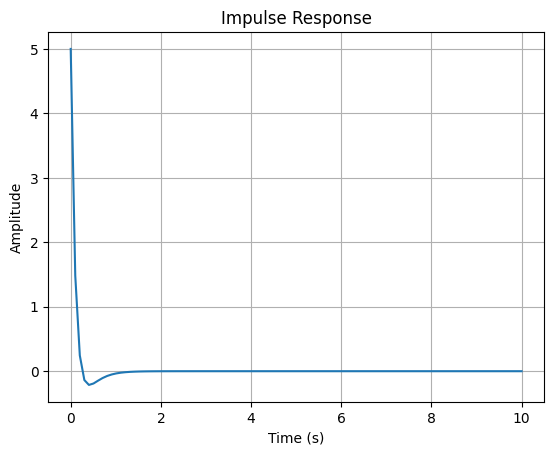

In [28]:
t = np.linspace(0, 10, 100)
t1, y1 = ct.impulse_response(G1, t)

plt.plot(t1, y1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid()

STEP RESPONSE 

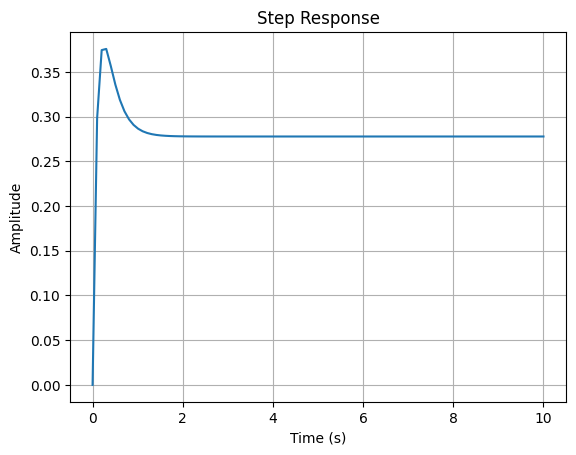

In [29]:
t = np.linspace(0, 10, 100)
t, y = ct.step_response(G1, t)

plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Step Response')
plt.grid()
plt.show()

STEP RESPONSE CHARACTERISTIC DAN BODE PLOT

H(s) =  <TransferFunction>: sys[15]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      5 s^2 + 35 s + 50
  --------------------------
  s^3 + 18 s^2 + 101 s + 180


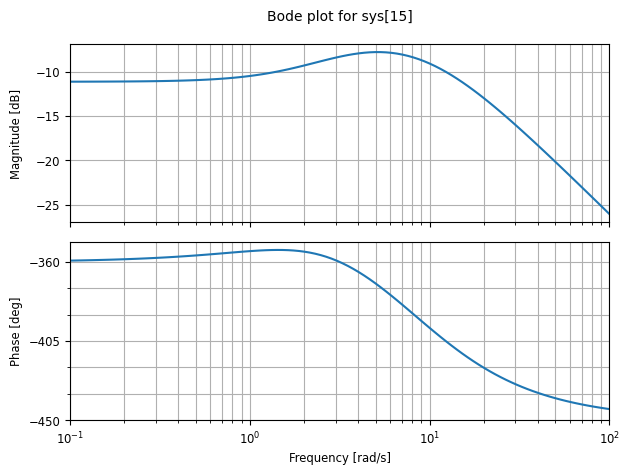

In [31]:
print('H(s) = ' ,G1)
ct.step_info(G1)

ct.bode_plot(G1, dB=True, Hz=False, deg=True, omega_limits=(0.1, 100), omega_num=100)
plt.show()

NYQUIST PLOT